In [10]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.cluster._kmeans')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)


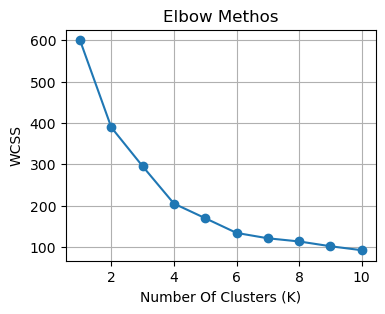

In [11]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (4,3))
plt.plot(range(1,11),wcss, marker="o")
plt.title("Elbow Methos")
plt.xlabel("Number Of Clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(x_scaled)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

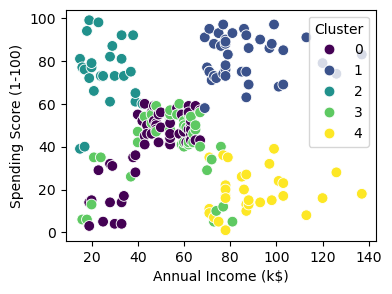

In [8]:
plt.figure(figsize = (4,3))
sb.scatterplot(
    x = "Annual Income (k$)",
    y = "Spending Score (1-100)",
    hue = "Cluster",
    data = df,
    palette = "viridis", 
    s = 60    
)

Text(0.5, 0.92, 'K-Means Clusters (3D)')

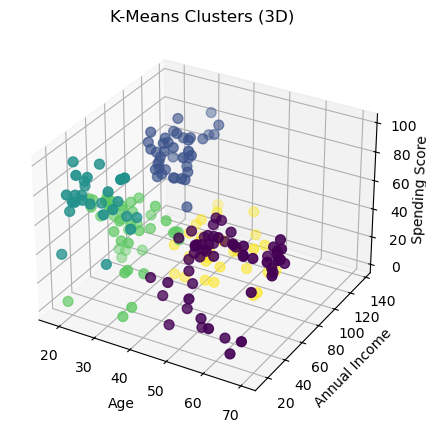

In [9]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"],
           c=df["Cluster"], cmap="viridis", s=50)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score", labelpad = 0)
plt.title("K-Means Clusters (3D)")
